# House Price Prediction

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

### Dataset: Boston housing dataset UCI ML repository

In [18]:
import pandas as pd
housing = pd.read_csv("/content/drive/MyDrive/ML LAB/Project/data.csv")

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

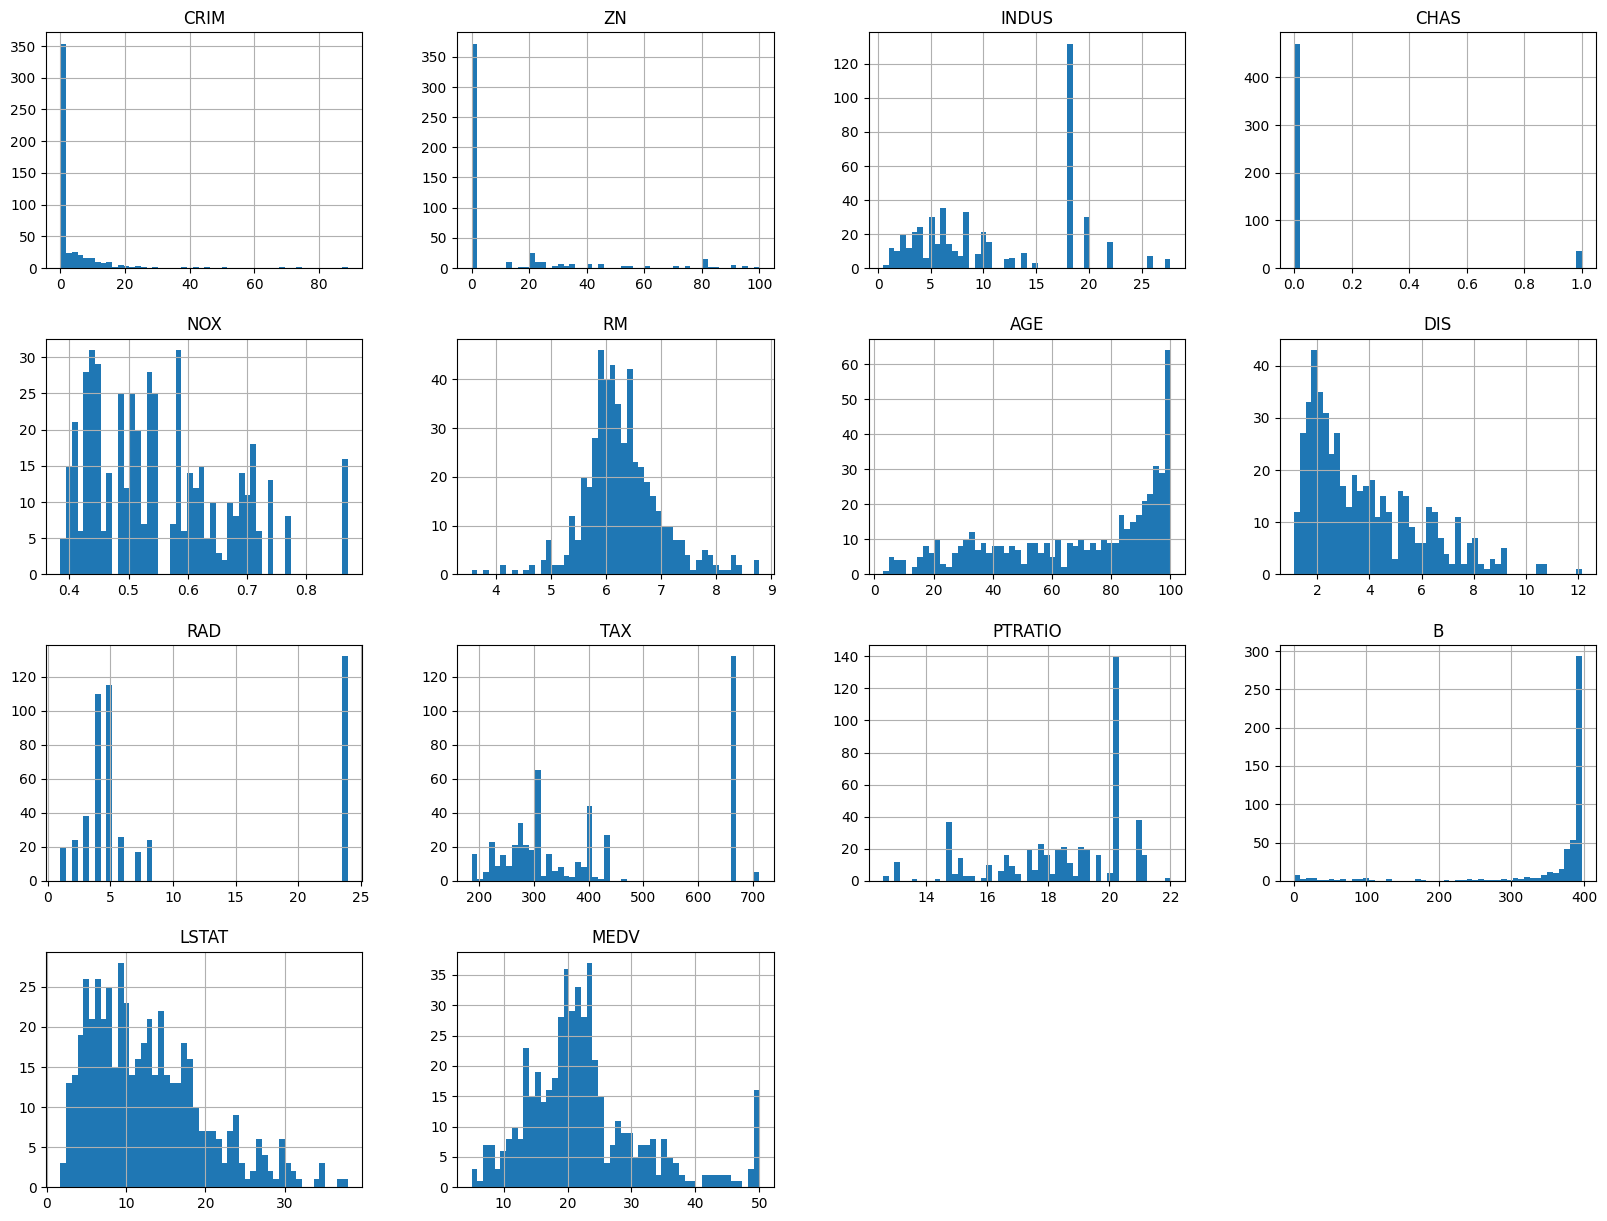

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Train Test Split

In [20]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [ ]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



## Stratifies Split on CHAS Column

In [22]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'housing' with a 'CHAS' column
# and you want to split it into train and test sets stratified by the 'CHAS' column.

# Define your test_size and random_state
test_size = 0.2
random_state = 42

# Create an empty DataFrame for stratified train and test sets
strat_train_set = pd.DataFrame()
strat_test_set = pd.DataFrame()

# Group the data by the 'CHAS' column
groups = housing.groupby('CHAS')

# Iterate over the groups
for group_name, group_data in groups:
    # Calculate the number of samples to include in the test set
    num_samples = int(len(group_data) * test_size)

    # Use random_state to ensure reproducibility
    np.random.seed(random_state)

    # Randomly shuffle the indices of the group
    shuffled_indices = np.random.permutation(len(group_data))

    # Select the first 'num_samples' indices for the test set
    test_indices = shuffled_indices[:num_samples]

    # Select the remaining indices for the train set
    train_indices = shuffled_indices[num_samples:]

    # Add the selected rows to the stratified train and test sets
    strat_test_set = pd.concat([strat_test_set, group_data.iloc[test_indices]])
    strat_train_set = pd.concat([strat_train_set, group_data.iloc[train_indices]])


In [23]:
import pandas as pd

def custom_value_counts(data, column_name):
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    counts = data[column_name].value_counts()
    return counts

# Example usage:
# Assuming you have a DataFrame 'strat_test_set' and you want to get the value counts for the 'CHAS' column
value_counts_result = custom_value_counts(strat_test_set, 'CHAS')
print(value_counts_result)

0    94
1     7
Name: CHAS, dtype: int64


In [24]:
value_counts_result = custom_value_counts(strat_train_set, 'CHAS')
print(value_counts_result)

0    377
1     28
Name: CHAS, dtype: int64


In [ ]:
7/94

0.07446808510638298

In [ ]:
28/377

0.07427055702917772

In [26]:
housing = strat_train_set.copy()

## Looking for correlations

In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [ ]:
# from pandas.plotting import scatter_matrix
# attributes = ["MEDV", "RM", "ZN", "LSTAT"]
# scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

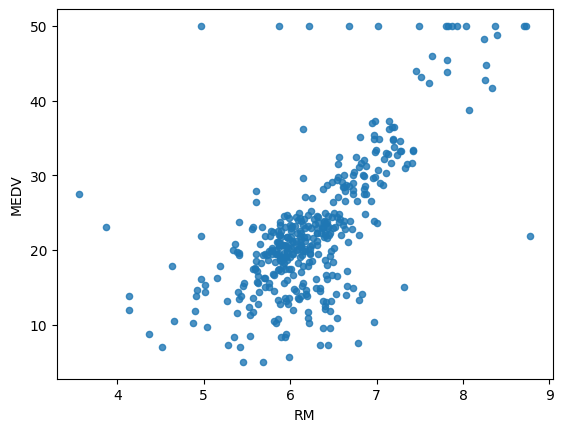

In [ ]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [27]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
449,7.52601,0.0,18.10,0,0.7130,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,103.786816
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4,50.406234
22,1.23247,0.0,8.14,0,0.5380,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2,49.983719
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7,35.499208
46,0.18836,0.0,6.91,0,0.4480,5.786,33.3,5.1004,3,233,17.9,396.90,14.15,20.0,40.269616


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677626
ZN         0.331789
B          0.319503
DIS        0.243090
CHAS       0.158192
RAD       -0.362749
AGE       -0.371203
CRIM      -0.386091
NOX       -0.416177
TAX       -0.436108
INDUS     -0.463648
PTRATIO   -0.481774
TAXRM     -0.508594
LSTAT     -0.729320
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

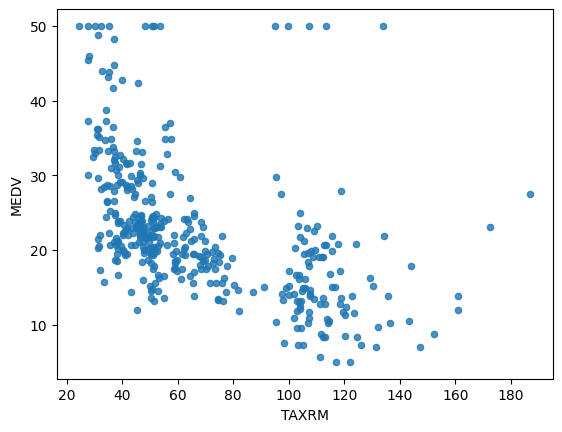

In [ ]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [29]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing attributes

In [ ]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,401.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.820903,11.622222,11.023753,0.069136,0.554263,6.259828,69.357037,3.814346,9.543210,406.491358,18.424938,355.929580,12.814593
std,9.281857,23.492715,6.853784,0.253999,0.116508,0.721169,27.669496,2.167959,8.733753,168.540291,2.169716,93.090516,7.226652
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.079780,0.000000,5.130000,0.000000,0.449000,5.876000,46.700000,2.063500,4.000000,277.000000,17.000000,375.330000,7.190000
50%,0.253560,0.000000,8.560000,0.000000,0.538000,6.167000,78.700000,3.215700,5.000000,330.000000,18.900000,391.980000,11.650000
75%,3.673670,12.500000,18.100000,0.000000,0.624000,6.616000,94.300000,5.287300,24.000000,666.000000,20.200000,396.900000,17.150000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [30]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Check for missing values in each column
missing_values = housing.isna().sum()

# If you prefer to use 'isnull()' method, you can do so as follows:
# missing_values = df.isnull().sum()

# Display the columns with missing values
print(missing_values)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         4
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


## Creating Pipeline

In [31]:
import numpy as np
import pandas as pd

# Define your DataFrame 'data'
# For demonstration purposes, let's assume you have a DataFrame named 'data'

# Step 1: Handle missing values (Imputation with median)
data=housing
for column in data.columns:
    if data[column].isnull().any():
        median = data[column].median()
        data[column].fillna(median, inplace=True)

# Step 2: Standardization
for column in data.columns:
    if data[column].dtype in [np.float64, np.float32, np.int64, np.int32]:
        mean = data[column].mean()
        std = data[column].std()
        data[column] = (data[column] - mean) / std

# Your data is now processed.

# Example usage:
# Assuming you have a DataFrame 'data', you can use this custom preprocessing pipeline to handle missing values and standardize your data.


In [32]:
missing_values = housing.isna().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [ ]:
data.shape

(405, 13)

In [42]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02,405.000000,4.050000e+02,4.050000e+02,4.050000e+02
mean,3.070246e-17,6.908054e-17,1.600914e-16,7.017706e-17,3.070246e-17,3.157968e-16,-2.982525e-16,-4.276415e-17,-6.359796e-17,0.000000,2.193033e-15,4.693091e-16,-5.263280e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.106768e-01,-4.947160e-01,-1.541302e+00,-2.721896e-01,-1.452803e+00,-3.759374e+00,-2.401816e+00,-1.238375e+00,-9.781831e-01,-1.302308,-2.684654e+00,-3.796408e+00,-1.533849e+00
25%,-4.030576e-01,-4.947160e-01,-8.599269e-01,-2.721896e-01,-9.034853e-01,-5.321698e-01,-8.188453e-01,-8.076011e-01,-6.346882e-01,-0.768311,-6.567395e-01,2.084038e-01,-7.783123e-01
50%,-3.843351e-01,-4.947160e-01,-3.594734e-01,-2.721896e-01,-1.395907e-01,-1.280725e-01,3.376629e-01,-2.761336e-01,-5.201898e-01,-0.453846,2.189511e-01,3.872620e-01,-1.611524e-01
75%,-1.586247e-02,3.736383e-02,1.032458e+00,-2.721896e-01,5.985548e-01,4.836471e-01,9.014607e-01,6.794194e-01,1.655278e+00,1.539742,8.181078e-01,4.401138e-01,5.999192e-01
max,9.174381e+00,3.761923e+00,2.438981e+00,3.664838e+00,2.718577e+00,3.512983e+00,1.107464e+00,3.834091e+00,1.655278e+00,1.806741,1.647709e+00,4.401138e-01,3.480921e+00


## Linear Regression Model

In [36]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted



In [38]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(data, housing_labels)

# Make predictions
predictions = model.predict(data)

print("Predictions:", predictions)

Predictions: [17.69883554 23.90847408 16.23933297 21.94981502 20.4489512  14.64865458
 12.70427166 18.68371699  8.14161549 32.0642296  30.42187284 20.12566328
 13.31612432 16.20114181 17.40927297 25.12638598 32.68361165 22.28213751
 18.51560278 24.98248677 22.02561668 26.53775637 23.64899262 20.01945262
 25.80557294 25.65244494  7.60441713 22.39132379 31.05940808 35.30224078
 31.00902959 21.89878227 24.38252133 32.374873   25.74189466 24.18281836
 22.12980148 21.15131984 26.07270452 23.86588128 29.09511191 18.63675755
 17.89007086 21.23989356 24.13959677 27.96018431 21.35022929 30.46233597
 21.70585377 16.06645072 20.01394356 23.09339856 23.10153543 27.7927839
 16.56187334 21.07096624 25.84290101 13.27735088 18.53192417 25.87615678
 27.51037089 20.55493493 30.87650074 20.52306952 18.99037307 16.34126934
  4.25578667 20.42591827  8.33911234 26.63265574 14.5523689  32.1038494
 34.48134195 20.26079308 17.85238281 16.5055381  25.07358574 14.36744872
 16.38457484 22.74942307 24.99693896 11.

### Model Evaluation

In [39]:
import numpy as np

# Calculate the squared differences
squared_errors = (housing_labels - predictions) ** 2

# Calculate the mean squared error (MSE)
mse = np.mean(squared_errors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 4.945529902802092


In [ ]:
# Other Evaluation techniques

## Decision Tree Regression Model

In [71]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return [self._predict_single(x, self.tree) for x in X]

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        impurity, threshold, split_index = self._find_best_split(X, y)

        if impurity <= 0.0 or (self.max_depth and depth >= self.max_depth) or n_samples < self.min_samples_split:
            return np.mean(y)

        left_indices = np.where(X[:, split_index] <= threshold)[0]
        right_indices = np.where(X[:, split_index] > threshold)[0]

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (split_index, threshold, left_tree, right_tree)


    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        if n_samples <= 1:
            return float('inf'), None, None

        impurity_parent = self._calculate_mse(y)

        best_impurity = float('inf')
        best_threshold = None
        best_split_index = None

        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            unique_values = np.unique(feature_values)

            for threshold in unique_values:
                left_indices = np.where(feature_values <= threshold)[0]
                right_indices = np.where(feature_values > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                impurity_left = self._calculate_mse(y[left_indices])
                impurity_right = self._calculate_mse(y[right_indices])
                weighted_impurity = (len(left_indices) / n_samples) * impurity_left + (len(right_indices) / n_samples) * impurity_right

                if weighted_impurity < best_impurity:
                    best_impurity = weighted_impurity
                    best_threshold = threshold
                    best_split_index = feature_index

        return best_impurity, best_threshold, best_split_index

    def _calculate_mse(self, y):
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        mse = np.mean((y - mean) ** 2)
        return mse

    def _predict_single(self, x, tree):
        if isinstance(tree, (int, float)):
            return tree

        split_index, threshold, left_tree, right_tree = tree
        if x[split_index] <= threshold:
            return self._predict_single(x, left_tree)
        else:
            return self._predict_single(x, right_tree)


In [75]:
# Create and train the Desicion Tree regression model
model = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
model.fit(np.array(data), np.array(housing_labels))

# # Make predictions
predictions = model.predict(np.array(data))

print("Predictions:", predictions)

Predictions: [13.036842105263158, 22.065384615384612, 15.534782608695652, 19.89074074074074, 22.065384615384612, 19.018181818181816, 15.534782608695652, 19.018181818181816, 9.471428571428572, 32.40833333333333, 27.915384615384617, 19.89074074074074, 13.036842105263158, 15.534782608695652, 19.89074074074074, 22.065384615384612, 27.915384615384617, 22.065384615384612, 19.89074074074074, 22.065384615384612, 23.27777777777778, 22.065384615384612, 22.065384615384612, 19.89074074074074, 22.065384615384612, 22.065384615384612, 9.471428571428572, 23.27777777777778, 32.40833333333333, 33.58888888888889, 32.40833333333333, 19.89074074074074, 22.065384615384612, 32.40833333333333, 27.915384615384617, 22.065384615384612, 22.065384615384612, 19.89074074074074, 26.42777777777778, 50.0, 32.40833333333333, 9.471428571428572, 19.89074074074074, 19.89074074074074, 27.915384615384617, 26.42777777777778, 26.42777777777778, 32.40833333333333, 22.065384615384612, 19.89074074074074, 20.488235294117647, 19.89

### Model Evaluation

In [76]:
import numpy as np

# Calculate the squared differences
squared_errors = (housing_labels - predictions) ** 2

# Calculate the mean squared error (MSE)
mse = np.mean(squared_errors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 2.8162598634670104


## RandomForestRegressor()

In [86]:
import numpy as np

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(len(X), len(X), replace=True)
            if self.max_features:
                feature_indices = np.random.choice(X.shape[1], self.max_features, replace=False)
                X_subsample = X[sample_indices][:, feature_indices]
            else:
                X_subsample = X[sample_indices]
            y_subsample = y[sample_indices]

            tree = DecisionTreeRegressor(self.max_depth, self.min_samples_split)
            tree.fit(X_subsample, y_subsample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]
        return np.mean(predictions, axis=0)

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return [self._predict_single(x, self.tree) for x in X]

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        impurity, threshold, split_index = self._find_best_split(X, y)

        if impurity <= 0.0 or split_index is None or threshold is None or (self.max_depth and depth >= self.max_depth) or n_samples < self.min_samples_split:
            return np.mean(y)

        left_indices = np.where(X[:, split_index] <= threshold)[0]
        right_indices = np.where(X[:, split_index] > threshold)[0]

        if len(left_indices) == 0 or len(right_indices) == 0:
            return np.mean(y)

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (split_index, threshold, left_tree, right_tree)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        if n_samples <= 1:
            return float('inf'), None, None

        impurity_parent = self._calculate_mse(y)

        best_impurity = float('inf')
        best_threshold = None
        best_split_index = None

        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            unique_values = np.unique(feature_values)

            for threshold in unique_values:
                left_indices = np.where(feature_values <= threshold)[0]
                right_indices = np.where(feature_values > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                impurity_left = self._calculate_mse(y[left_indices])
                impurity_right = self._calculate_mse(y[right_indices])
                weighted_impurity = (len(left_indices) / n_samples) * impurity_left + (len(right_indices) / n_samples) * impurity_right

                if weighted_impurity < best_impurity:
                    best_impurity = weighted_impurity
                    best_threshold = threshold
                    best_split_index = feature_index

        return best_impurity, best_threshold, best_split_index

    def _calculate_mse(self, y):
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        mse = np.mean((y - mean) ** 2)
        return mse

    def _predict_single(self, x, tree):
        if isinstance(tree, (int, float)):
            return tree

        split_index, threshold, left_tree, right_tree = tree
        if x[split_index] <= threshold:
            return self._predict_single(x, left_tree)
        else:
            return self._predict_single(x, right_tree)


In [87]:
# Create and train the Desicion Tree regression model
model = RandomForestRegressor()
model.fit(np.array(data), np.array(housing_labels))

# # Make predictions
predictions = model.predict(np.array(data))

print("Predictions:", predictions)

Predictions: [13.37440952 19.67719286 15.40424881 21.41999675 20.43701429 19.72006111
 16.28093571 19.67165    12.7577     31.13086667 31.35878333 19.05816515
  9.9091     16.05478333 17.86734444 19.85127698 29.33688333 22.00858571
 16.44735397 23.23010476 22.93714286 24.86700952 23.5623381  20.68701429
 20.87589863 24.0471      7.79935238 25.11106667 32.58265556 34.97131548
 33.44088333 19.9749619  22.38246667 35.17288413 27.29648333 20.87312857
 19.93889127 22.92362857 24.05105    46.33772587 33.983      10.93180549
 18.97037857 21.45089372 23.50665952 25.16786071 21.68826667 34.33283333
 21.27444524 16.93541944 23.97395833 20.76860238 20.10014762 22.19866667
 14.3177119  20.11398333 19.52296667 13.57430952 11.68016667 28.47397857
 25.93791667 14.19417857 29.28109048 20.62363571 18.66198095 14.66025714
 14.55086905 20.13378571  6.57437619 24.43069762 11.80104524 31.28225238
 29.97021667 19.85978016 13.17131905 15.8802316  23.5408     14.48455476
 12.49121667 22.25388182 22.92028961 1

### Model Evaluation

In [88]:
import numpy as np

# Calculate the squared differences
squared_errors = (housing_labels - predictions) ** 2

# Calculate the mean squared error (MSE)
mse = np.mean(squared_errors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 1.3823386843106842


## Saving Model

In [89]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing model on Test data

In [90]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()

In [92]:
import numpy as np
import pandas as pd

# Define your DataFrame 'data'
# For demonstration purposes, let's assume you have a DataFrame named 'data'

# Step 1: Handle missing values (Imputation with median)
data=X_test
for column in data.columns:
    if data[column].isnull().any():
        median = data[column].median()
        data[column].fillna(median, inplace=True)

# Step 2: Standardization
for column in data.columns:
    if data[column].dtype in [np.float64, np.float32, np.int64, np.int32]:
        mean = data[column].mean()
        std = data[column].std()
        data[column] = (data[column] - mean) / std

# Your data is now processed.

# Example usage:
# Assuming you have a DataFrame 'data', you can use this custom preprocessing pipeline to handle missing values and standardize your data.


In [93]:
predictions = model.predict(np.array(data))

In [96]:
print("Predictions:", predictions)

Predictions: [33.37963333 21.53815476 15.68332143 30.5084     15.55442698 25.13641071
 45.762587   19.65289794  8.34413095 23.69480476 20.70781515 12.31303333
 10.05234762 20.8503961  19.778075   19.52492381 20.0744     23.30486667
 17.54694286 20.43906667 24.77433333 20.86728214 19.42313333 41.84642013
 20.11675    46.26648906 15.47141905 21.46098333 15.6793381  26.31057262
 18.94994524 34.82857738 24.55901905 10.04423095 19.28619524 26.0368
 12.30560714 19.59622857 19.46081746 15.89235    22.73672857 47.5408416
 25.561525   41.26206905 16.7873746  19.75784167 22.69570476 22.48845
 21.70916818 17.69078333 12.84852381 32.87117222 46.99008149 11.53108095
 23.07726667 19.13770278 19.69628077 16.74739048 20.26815    14.64947684
 19.08449762 21.32020628 19.76535079 33.46662937 23.09968452 18.83505556
 24.77495476 11.65398333 26.6037     11.0357381  30.98277381 19.05882601
 36.37528452  9.45133333 18.80737619  9.35717857 21.15775952 22.35828571
 21.10966172  9.8847619  22.56717619 23.397533

## Model Evaluation

In [95]:
import numpy as np

# Calculate the squared differences
squared_errors = (Y_test - predictions) ** 2

# Calculate the mean squared error (MSE)
mse = np.mean(squared_errors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 2.8166770346677232


## Using the model

In [97]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.74960476])